## Рынок заведений общественного питания Москвы

### План работы:

#### Шаг 1. Загрузка данных и подготовка к анализу

#### Шаг 2. Анализ данных:

    2.1 Исследовать соотношение видов объектов общественного питания по количеству. 
    2.2 Исследовать соотношение сетевых и несетевых заведений по количеству.
    2.3 Определить, для какого вида объекта общественного питания характерно сетевое распространение.
    2.4 Характерные признаки сетевых заведений.
    2.5 Определить среднее количество посадочных мест для каждого вида объекта общественного питания. определить, какой вид предоставляет в среднем самое большое количество посадочных мест.
    2.6 Выделить в отдельный столбец информацию об улице из столбца address.
    2.7 Построить график топ-10 улиц по количеству объектов общественного питания. Определить в каких районах Москвы находятся эти улицы.
    2.8 Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?
    
#### Шаг 3. Вывод

#### Описание данных:
    object_name — название объекта общественного питания;
    chain — сетевой ресторан;
    object_type — тип объекта общественного питания;
    address — адрес;
    number — количество посадочных мест.

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import re
pd.options.mode.chained_assignment = None  

#### Шаг 1. Загрузка данных и подготовка к анализу

In [34]:
path = 'C://Users//1//Desktop//'
rest_data = pd.read_csv(path + 'rest_data.csv')

In [35]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [36]:
rest_data

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [37]:
# привожу строки к нижнему регистру
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data['address'] = rest_data['address'].str.lower()
# удаляю дубликаты по двум столбцам
rest_data =  rest_data.drop_duplicates(subset = ['object_name', 'address'])
rest_data_chain = rest_data.query('chain == "да"')
len(rest_data_chain['object_name'].unique())

576

Полных дубликатов нет, id в каждой строке уникален, но при этом встречаются дубликаты по столбцам 'object_name' и 'address'. Кроме того, формат названия одинаковых заведений отличен. 

Полная обработка всех дубликатов означает ручной перебор всех встречающихся названий одного и того же сетевого заведения с заменой его на какой-то стандартный вариант. Учитывая то, что в таблице более 576 уникальных названий и то, что непосредственно с конкретными сетями в проекте не связано ни одно задание, а так же учитывая временные рамки проекта, считаю, что полная обработка дубликатов нерациональна.

#### 2 Анализ данных:

##### 2.1 Исследовать соотношение видов объектов общественного питания по количеству. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text yticklabel objects>)

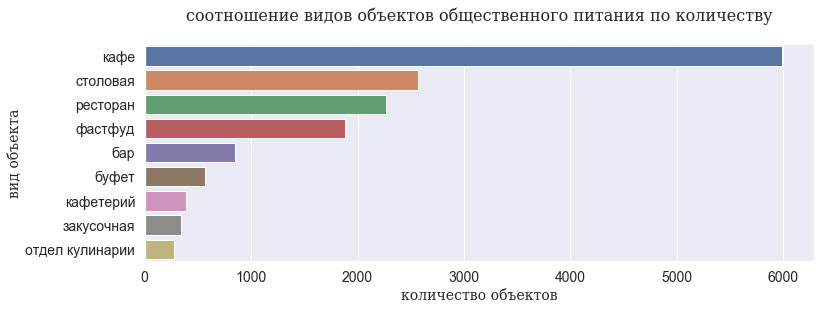

In [38]:
# поменяю длинные названия видов предприятий на более лаконичные. Длинные названия портят вид графика
rest_data.loc[rest_data['object_type'] == 'предприятие быстрого обслуживания', 'object_type'] = 'фастфуд'
rest_data.loc[rest_data['object_type'] == 'магазин (отдел кулинарии)', 'object_type'] = 'отдел кулинарии'
sns.countplot(y = 'object_type', data = rest_data,
              order = rest_data['object_type'].value_counts().index)
plt.xlabel('количество объектов',fontsize = 14, fontfamily = 'serif')
plt.ylabel('вид объекта', fontsize = 14, fontfamily = 'serif')
plt.title('соотношение видов объектов общественного питания по количеству', fontsize = 16, fontfamily = 'serif', y=1.08)
sns.set(rc={'figure.figsize':(12,4)})
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [39]:
round(len(rest_data.loc[rest_data['object_type'] == 'кафе'])/len(rest_data),2)

0.4

Кафе распространены больше, чем другие виды заведений, но такой график не дает возможности сделать однозначных выводов о том, какие именно заведения преобладают. Многие заведения могут позиционировать себя как кафе, так и как ресторан. Полезнее бы было работать с информацией о средних чеках в заведениях и наличии алкоголя в меню объекта общественного питания. Каждое 4-ое заведение общественного питания в Москве - это кафе.

##### 2.2 Исследовать соотношение сетевых и несетевых заведений по количеству. 

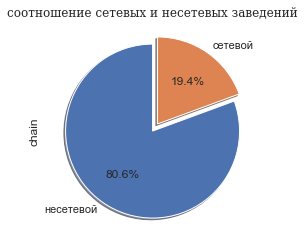

In [40]:
rest_data['chain'].value_counts().plot.pie(y='chain',labels=['несетевой','сетевой'], shadow=True,
                                           explode = (0, 0.1), startangle=90, autopct='%1.1f%%')
plt.title('соотношение сетевых и несетевых заведений', fontsize = 12, fontfamily = 'serif');

Сетевые заведения составляют менее 20%.

##### 2.3 Определить, для какого вида объекта общественного питания характерно сетевое распространение.

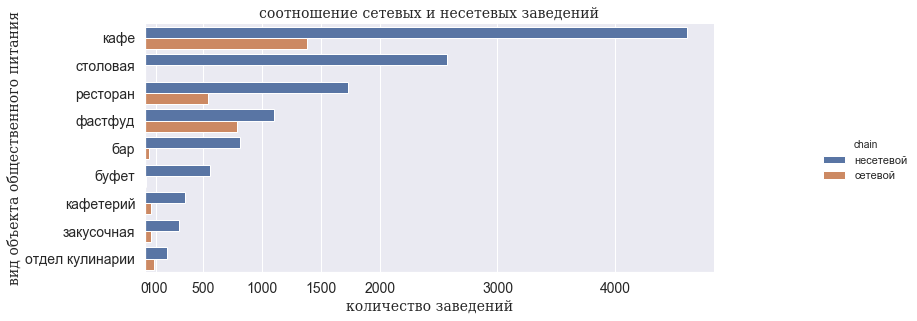

In [41]:
# поменяю значения 'да', 'нет' в столбце 'chain' для того, чтобы не корректировать легенду
rest_data.loc[rest_data['chain'] == 'да', 'chain'] = 'сетевой'
rest_data.loc[rest_data['chain'] == 'нет', 'chain'] = 'несетевой'
rest_data_pivot = rest_data.pivot_table(index =['object_type','chain'], values = 'id', aggfunc ='count')
rest_data_pivot = rest_data_pivot.reset_index()
sns.catplot(y="object_type",x="id",data=rest_data_pivot, hue = 'chain',kind = 'bar',height=6,
            order = rest_data['object_type'].value_counts().index)
plt.title('соотношение сетевых и несетевых заведений', fontsize = 14, fontfamily = 'serif')
plt.ylabel('вид объекта общественного питания', fontsize = 14, fontfamily = 'serif')
plt.xticks([0,100, 500, 1000, 1500,2000,3000,4000])
plt.xlabel('количество заведений', fontsize = 14, fontfamily = 'serif')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.gcf().set_size_inches(15, 4)

Кафе и рестораны отражают общую статистику. Сетевых баров, буфетов и столовых значительно меньше, чем сетевых заведений другого типа.
Сетевое распространение наиболее характерно для предприятий быстрого обслуживания, если под этим понимать отношение сетевых к несетевым точкам питания отдельного вида.

##### 2.4. Характерные признаки сетевых заведений

Text(0.5, 1.0, 'количество посадочных мест в сетевых заведениях')

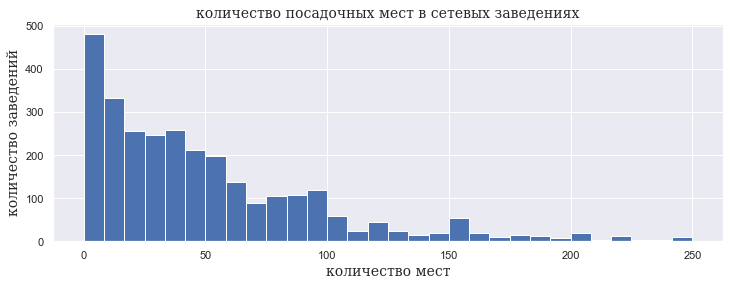

In [42]:
# как в данных присутствуют выбросы, которые явно ухудшат визуальное восприятие графика и растянут сетку по x, то правильным считаю 
# удалить их 
rest_data_chain = rest_data_chain.query('number <= 250')
rest_data_chain['number'].hist(bins = 30)
plt.ylabel('количество заведений', fontsize = 14, fontfamily = 'serif')
plt.xlabel('количество мест', fontsize = 14, fontfamily = 'serif')
plt.xticks([0,50,100,150,200,250])
plt.title('количество посадочных мест в сетевых заведениях', fontsize = 14, fontfamily = 'serif')

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text xticklabel objects>)

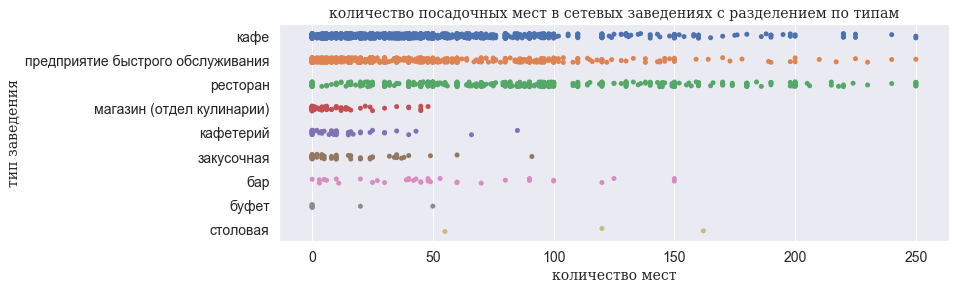

In [43]:
# тот же параметр с разделением по типу заведения
sns.stripplot(y="object_type", x="number", data=rest_data_chain)
sns.set(rc={'figure.figsize':(12,6)})
plt.ylabel('тип заведения', fontsize = 14, fontfamily = 'serif')
plt.xlabel('количество мест', fontsize = 14, fontfamily = 'serif')
plt.title('количество посадочных мест в сетевых заведениях с разделением по типам', fontsize = 14, fontfamily = 'serif')
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

Для сетевых заведений характерно большое количество заведений с небольшим количеством посадочных мест. 
По графику видно, что длинный хвост гистограммы  это исключительно кафе, рестораны и фастфуд.

##### 2.5 Определить среднее количество посадочных мест для каждого вида объекта общественного питания. определить, какой вид предоставляет в среднем самое большое количество посадочных мест.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text yticklabel objects>)

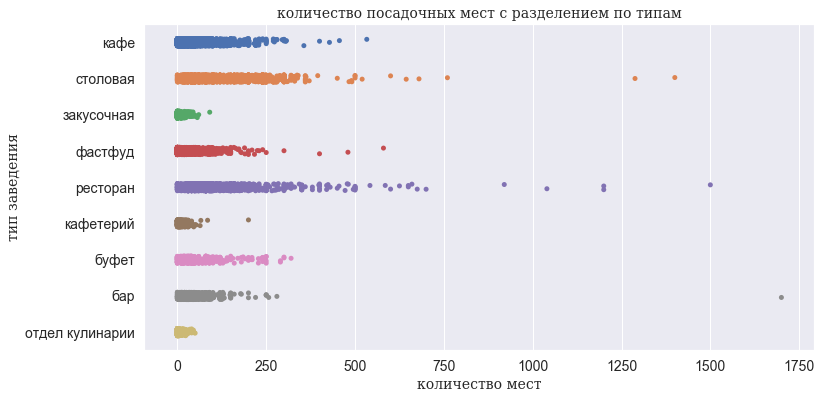

In [44]:
sns.stripplot(y="object_type", x="number", data=rest_data)
sns.set(rc={'figure.figsize':(16,8)})
plt.ylabel('тип заведения', fontsize = 14, fontfamily = 'serif')
plt.xlabel('количество мест', fontsize = 14, fontfamily = 'serif')
plt.title('количество посадочных мест с разделением по типам', fontsize = 14, fontfamily = 'serif')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

Есть выбросы у типов заведения - 'столовая', 'ресторан' и 'бар', поэтому буду считать среднее по медиане.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

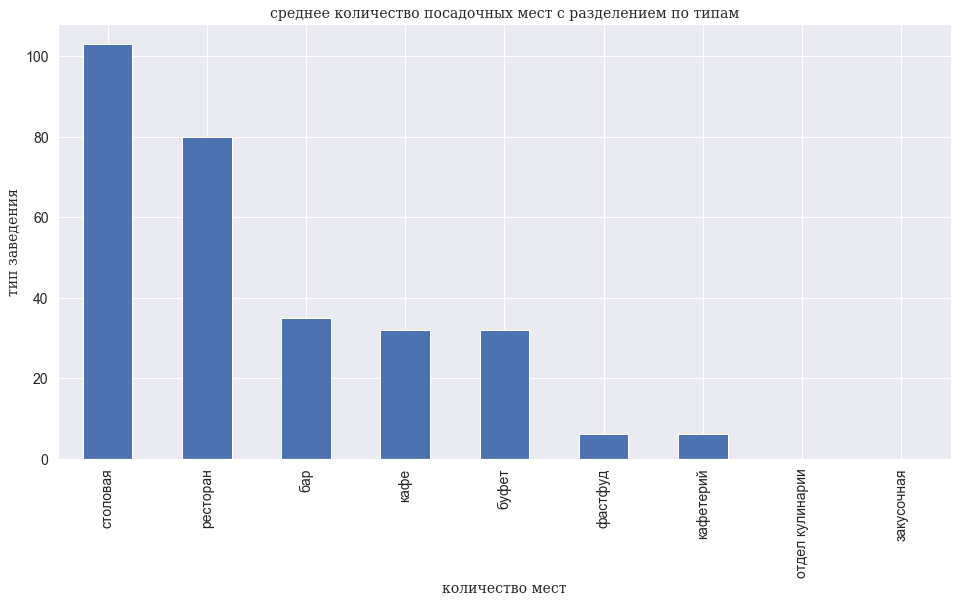

In [45]:
rest_data.groupby('object_type')['number'].median().sort_values(ascending=False).plot(kind = 'bar')
plt.title('среднее количество посадочных мест с разделением по типам', 
          fontsize = 14, fontfamily = 'serif')
plt.ylabel('тип заведения', fontsize = 14, fontfamily = 'serif')
plt.xlabel('количество мест', fontsize = 14, fontfamily = 'serif')
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

##### 2.6 Выделить в отдельный столбец информацию об улице из столбца address.

In [46]:
rest_data_new = rest_data.copy()
rest_data_new['street'] = rest_data_new['address'].str.extract(r'[^,]+,([^,]+)')

##### 2.7 Построить график топ-10 улиц по количеству объектов общественного питания. Определить в каких районах Москвы находятся эти улицы.

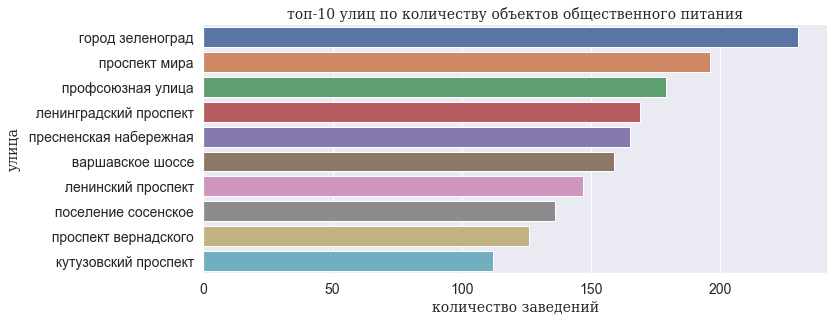

In [47]:
sns.catplot(x = 'id', y= 'street', kind = 'bar', size=6,
              data = rest_data_new.groupby('street')['id'].count().sort_values(ascending=False).reset_index().head(10))
plt.ylabel('улица', fontsize = 14, fontfamily = 'serif')
plt.xlabel('количество заведений', fontsize = 14, fontfamily = 'serif')
plt.title('топ-10 улиц по количеству объектов общественного питания', fontsize = 14, fontfamily = 'serif')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.gcf().set_size_inches(15, 4)

In [48]:
# загружаю таблицу с данными о районах 
path = 'C://Users//1//Desktop//'
gaz = pd.read_csv(path + 'mosgaz.csv')
top_10 = rest_data_new.groupby('street')['id'].count().sort_values(ascending=False).reset_index().head(10)
gaz = gaz.rename(columns={'streetname': 'street'})
# убираю пробелы и перевожу в нижний регистр данные из таблицы gaz для объединения таблиц
gaz['street'] = gaz['street'].str.strip()
gaz['street'] = gaz['street'].str.lower()
top_10['street'] = top_10['street'].str.strip()
# было решено добавить не район, а округ, так как многие улицы находятся в нескольких районах, это приводит к тому, что
# в таблице появляется большое количество дубликатов
top_10_okrug = top_10.merge(gaz[['street','okrug']], on = 'street', how = 'left')

In [49]:
top_10_okrug = top_10_okrug.drop_duplicates().reset_index(drop = True)
# оставляю по одному округу, приоритет отдавался округам, в которых протяженность улицы больше.
top_10_okrug = top_10_okrug.drop(top_10_okrug.index[[2,7,9,10,11,14]])
top_10_okrug = top_10_okrug.reset_index(drop=True)

In [50]:
# в таблице осталось одно значение NaN, которому не соответсвует ни один из округов в таблице, заменяю его на название поселения
top_10_okrug.fillna('поселение сосенское', inplace=True)
top_10_okrug

,street,id,okrug
0,город зеленоград,230,Зеленоград
1,проспект мира,196,СВАО
2,профсоюзная улица,179,ЮЗАО
3,ленинградский проспект,169,САО
4,пресненская набережная,165,ЦАО
5,варшавское шоссе,159,ЮАО
6,ленинский проспект,147,ЗАО
7,поселение сосенское,136,поселение сосенское
8,проспект вернадского,126,ЗАО
9,кутузовский проспект,112,ЗАО


В городе Зеленограде находится больше заведений общепита, чем в любом одном районе города Москвы.

##### 2.8 Оценить распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Выявить закономерности.

In [51]:
# отфильтрую данные и оставлю заведения с улиц с самым большим количеством объектов общепита
filter_data = list(top_10['street'])
rest_data_new['street'] = rest_data_new['street'].str.strip()
rest_data_new['top'] = rest_data_new['street'].isin(filter_data)
rest_data_new_filter = rest_data_new.query('top == True')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text yticklabel objects>)

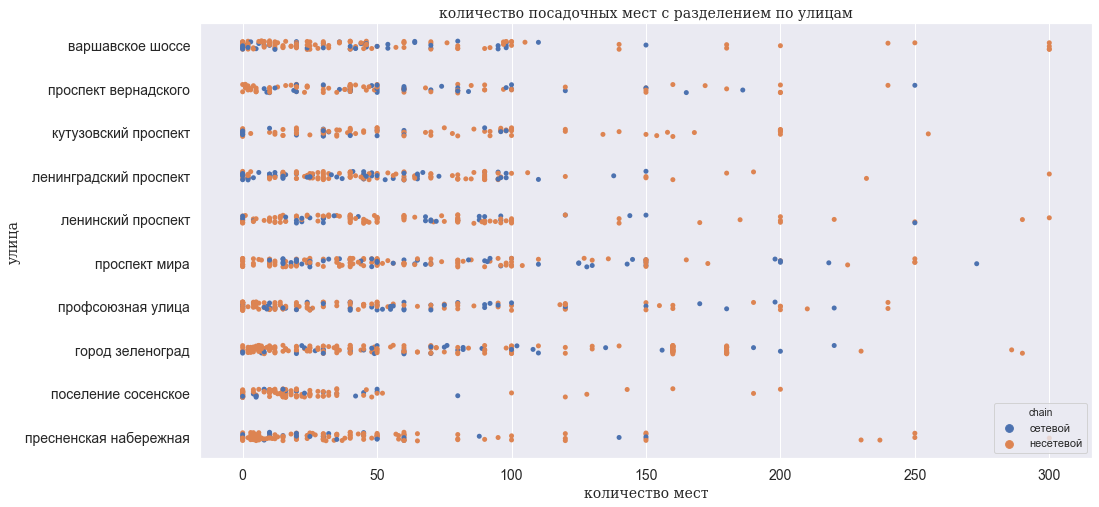

In [52]:
# поставлю фильтр на 300 посадочных мест для общей оценки
rest_data_new_filter_number300 = rest_data_new_filter.query('number <=300')
sns.stripplot(y="street", x="number", data=rest_data_new_filter_number300, hue = 'chain')
sns.set(rc={'figure.figsize':(16,8)})
plt.ylabel('улица', fontsize = 14, fontfamily = 'serif')
plt.xlabel('количество мест', fontsize = 14, fontfamily = 'serif')
plt.title('количество посадочных мест с разделением по улицам', fontsize = 14, fontfamily = 'serif')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

Заведения до 100 посадочных мест распределены равномерно, невозможно выделить незанятый сегмент. Это может свидетельствовать о высокой конкуренции. Так же можно наблюдать на Кутузовском проспекте, Ленинградском проспекте, Ленинском проспекте и Пресненской набережной низкое количество заведений с большим количеством посадочных мест.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text yticklabel objects>)

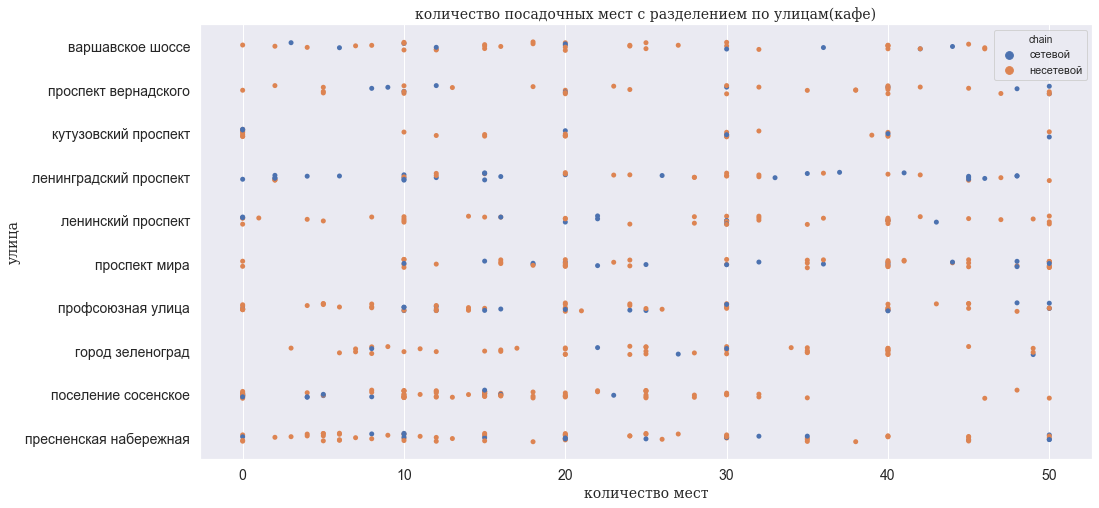

In [53]:
# оставлю тот сегмент рынка, который требовалось исследовать в рамках проекта,а именно небольшие кафе
rest_data_new_filter_cafe = rest_data_new_filter.query('object_type =="кафе" & number <=50')
sns.stripplot(y="street", x="number", data=rest_data_new_filter_cafe, hue = 'chain')
sns.set(rc={'figure.figsize':(16,8)})
plt.ylabel('улица', fontsize = 14, fontfamily = 'serif')
plt.xlabel('количество мест', fontsize = 14, fontfamily = 'serif')
plt.title('количество посадочных мест с разделением по улицам(кафе)', fontsize = 14, fontfamily = 'serif')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

Исследуя график, можно сделать вывод, что сегмент небольших кафе занят достаточно плотно. Учитывая то, что в рамках проекта мы рассматриваем открытие небольшого кафе с большими стартовыми затратами, то есть риск столкнуться с высокой конкуренцией и не окупить проект. Если изначально ставилась задача реального исследования, а не поиск дополнительных аргументов, которые помогли бы убедить инвесторов, то стоит рассмотреть другой формат заведения. Было замечено, что на некоторых улицах с большим количеством объектов общественного питания отсутствуют заведения с большим количеством посадочных мест, учитывая то, что изначально проект небольшого кафе подразумевал высокие затраты, то можно рассмотреть как альтернативу, проект заведения большей площади и посадочных мест.

In [54]:
# посмотрю, что это за заведения и предложу альтернативный вариант
# оставлю в таблице улицы с низким количеством заведений с большим количеством посадочных мест
filter_data = ["кутузовский проспект","ленинский проспект","ленинградский проспект","пресненская набережная"]
rest_data_new['select_street'] = rest_data_new['street'].isin(filter_data)

In [55]:
rest_data_new_filter_select_street = rest_data_new.query('select_street == True')
rest_data_new_filter_select_street = rest_data_new_filter_select_street.query('100 <number <200 ')

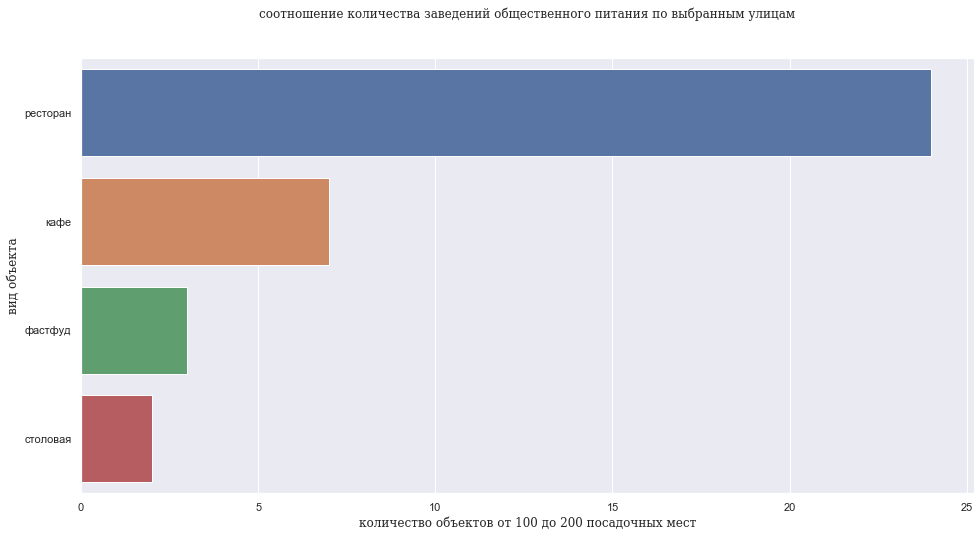

In [56]:
sns.countplot(y = 'object_type', data =rest_data_new_filter_select_street, 
              order = rest_data_new_filter_select_street['object_type'].value_counts().index)
plt.xlabel('количество объектов от 100 до 200 посадочных мест',fontsize = 12, fontfamily = 'serif')
plt.ylabel('вид объекта', fontsize = 12, fontfamily = 'serif')
plt.title('соотношение количества заведений общественного питания по выбранным улицам', fontsize = 12, fontfamily = 'serif', y=1.08)
sns.set(rc={'figure.figsize':(9,2)})

Соотношение кафе и ресторанов на Кутузовском проспекте,Ленинском проспекте, Ленинградском проспекте и Пресненской набережной явно отличается от того, что было видно по общим данным. Ниже выведу тот же график, но для 10 улиц с самым большим количеством заведний общепита.

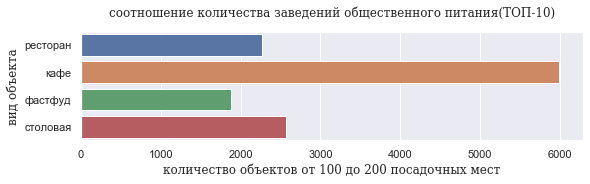

In [57]:
rest_data_filter_100_300 = rest_data_new_filter.query('100 <number <200 ')
sns.countplot(y = 'object_type', data = rest_data ,
              order =rest_data_new_filter_select_street['object_type'].value_counts().index)
plt.xlabel('количество объектов от 100 до 200 посадочных мест',fontsize = 12, fontfamily = 'serif')
plt.ylabel('вид объекта', fontsize = 12, fontfamily = 'serif')
plt.title('соотношение количества заведений общественного питания(ТОП-10)', fontsize = 12, fontfamily = 'serif', y=1.08)
sns.set(rc={'figure.figsize':(9,2)})

Если посмотреть на два последних графика, то можно увидеть, как отличается соотношение количества ресторанов и кафе по улицам с самым большим количеством заведний общепита и 4 выбранным из этого списка улицам (Кутузовский проспект, Ленинский проспект, Ленинградский проспект, Пресненская набережная). На этих улицах низкое количество заведений типа 'кафе' с количеством посадочных мест от 100 до 200, при этом достачно большое количество ресторанов, это косвенно может свидетельствовать о том, что помещения нужного формата в данных районах есть.

##### 3.9 Вывод.
Небольшое кафе с высокими стартовыми затратами будет вынуждено конкурировать с большим количеством подобных заведений.  Как альтернативный вариант, возможно рассмотрение открытия заведения типа 'кафе' на Кутузовском, Ленинском, Ленинградском проспекте или Пресненская набережная с количеством посадочных место от 100 до 200 с перспективой развития сети по перечисленным улицам.